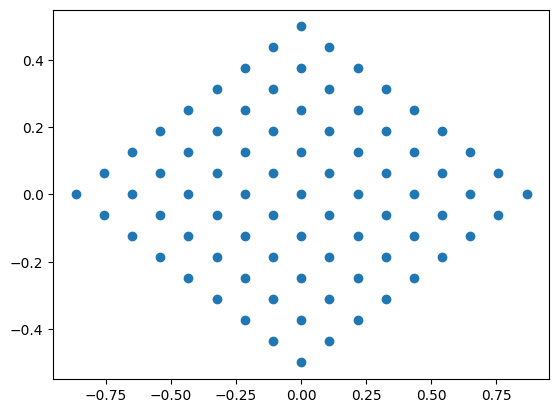

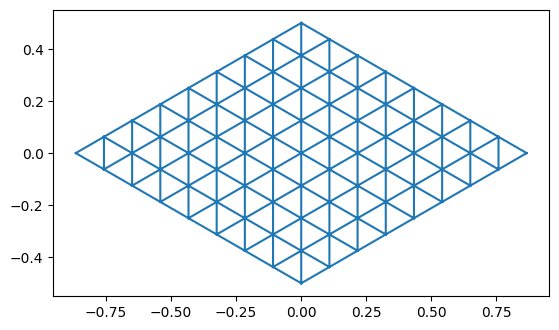

Face_Nodes_length: 128
Nodes_length: 81


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Parameters
L = 1
n = 8  # Based on the mesh example in the PDF
l = L / n
y = []
x = []

# Create main stingray mesh
for i in range(n + 1):
    num_points = i + 1  # Only i + 1 points in each row
    y_temp = np.linspace(-i * l / 2, i * l / 2, num_points)  # generate points symmetrically
    y.extend(y_temp)

    x_temp = (np.sqrt(3) / 2) * (i - n) * l * np.ones(len(y_temp))  # equidistant x-coordinates
    x.extend(x_temp)

# Mirror part of the mesh
y_mirror = []
x_mirror = []
for i in range(n):
    num_points = i + 1
    y_temp = np.linspace(-i * l / 2, i * l / 2, num_points)
    y_mirror.extend(y_temp)

    x_temp = (np.sqrt(3) / 2) * (n - i) * l * np.ones(len(y_temp))
    x_mirror.extend(x_temp)

# Combine the original and mirrored points
x_total = np.concatenate([x, x_mirror])
y_total = np.concatenate([y, y_mirror])

# Scatter plot
plt.figure()
plt.scatter(x_total, y_total)
plt.show()

# Perform Delaunay triangulation
points = np.vstack((x_total, y_total)).T
tri = Delaunay(points)

# Plot the triangulation
plt.figure()
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.gca().set_aspect('equal')
plt.show()

# Extract the elements (triangles) and nodes
Face_Nodes = tri.simplices  # same as DT.ConnectivityList in MATLAB
Nodes = points  # same as DT.Points in MATLAB
Nodes = np.hstack((Nodes, np.zeros((Nodes.shape[0], 1))))  # Add zeros column for Z coordinate

# For face nodes, change to matlab based indexing
Face_Nodes = Face_Nodes + np.ones((len(Face_Nodes),3));

print("Face_Nodes_length:",len(Face_Nodes))
print("Nodes_length:",len(Nodes))
# print("Face_Nodes:", Face_Nodes)
# print("Nodes:", Nodes)


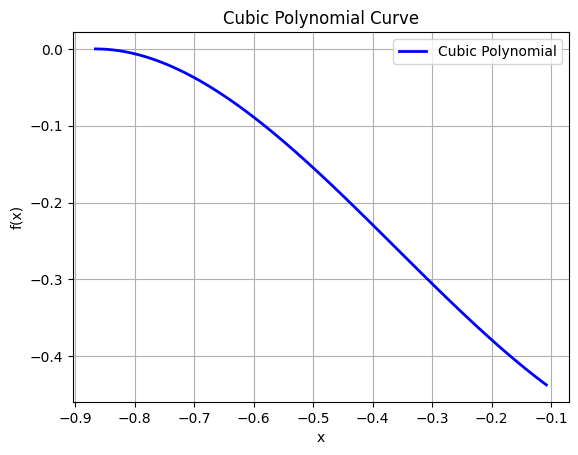

In [42]:
from sympy import symbols, Eq, solve

# Define x1, x2, y1, y2
x1 = -l * np.sqrt(3) / 2  # right most point of the curve
y1 = -(n - 1) * l / 2
x2 = -n * l * np.sqrt(3) / 2  # left most point of the curve
y2 = 0

# Define symbolic variables for coefficients
a, b, c, d = symbols('a b c d')
x = symbols('x')

# Define the equations
eq1 = Eq(a * x1**3 + b * x1**2 + c * x1 + d, y1)  # f(x1) = y1
eq2 = Eq(a * x2**3 + b * x2**2 + c * x2 + d, y2)  # f(x2) = y2
eq3 = Eq(3 * a * x1**2 + 2 * b * x1 + c, -1 / np.sqrt(3))  # f'(x1) = slope at x1
eq4 = Eq(3 * a * x2**2 + 2 * b * x2 + c, 0)  # f'(x2) = slope at x2

# Solve the system of equations
solution = solve([eq1, eq2, eq3, eq4], (a, b, c, d))

# Extract coefficients
a_val = float(solution[a])
b_val = float(solution[b])
c_val = float(solution[c])
d_val = float(solution[d])

# Define the cubic polynomial function
def f(x):
    return a_val * x**3 + b_val * x**2 + c_val * x + d_val

def f_mirrored(x):
    return -a_val * x**3 + b_val * x**2 - c_val * x + d_val

# Generate x values over the range of interest
x_values = np.linspace(x1, x2, 100)

# Compute the y values using the cubic function
y_values = f(x_values)

# Plot the cubic curve
plt.plot(x_values, y_values, 'b-', linewidth=2)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Cubic Polynomial Curve')
plt.legend(['Cubic Polynomial'])
plt.show()

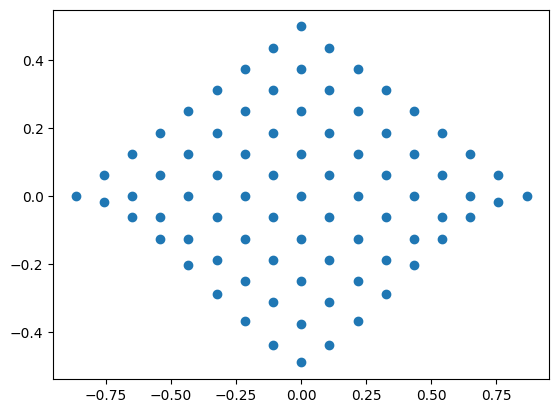

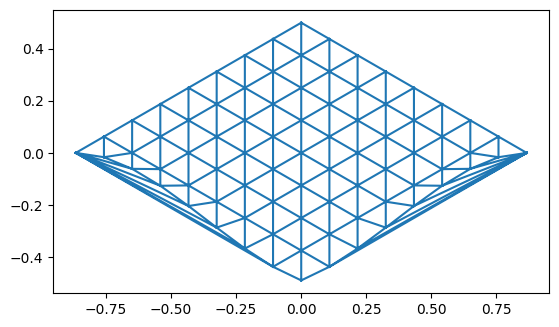

In [43]:
y = []
x = []
tol = 1e-2
# Create main stingray mesh
for i in range(n + 1):
    num_points = i + 1  # Only i + 1 points in each row
    y_temp = np.linspace(-i * l / 2, i * l / 2, num_points)  # generate points symmetrically

    x_temp = (np.sqrt(3) / 2) * (i - n) * l * np.ones(len(y_temp))  # equidistant x-coordinates
    y_temp_last = f(x_temp[0]) # change the last point to the one from the curve
    if i>0:
        if (-y_temp_last+y_temp[1])<tol :
            y_temp = y_temp[1:]
            x_temp = x_temp[1:]

    y_temp[0] = y_temp_last
    x.extend(x_temp)
    y.extend(y_temp)

# Mirror part of the mesh
y_mirror = []
x_mirror = []
for i in range(n):
    num_points = i + 1
    y_temp = np.linspace(-i * l / 2, i * l / 2, num_points)

    x_temp = (np.sqrt(3) / 2) * (n - i) * l * np.ones(len(y_temp))
    y_temp_last = f_mirrored(x_temp[0]) # change the last point to the one from the curve
    if i>0:
        if (-y_temp_last+y_temp[1])<tol :
            y_temp = y_temp[1:]
            x_temp = x_temp[1:]

    y_temp[0] = y_temp_last

    x_mirror.extend(x_temp)
    y_mirror.extend(y_temp)

# Combine the original and mirrored points
x_total = np.concatenate([x, x_mirror])
y_total = np.concatenate([y, y_mirror])

# Scatter plot
plt.figure()
plt.scatter(x_total, y_total)
plt.show()

# Perform Delaunay triangulation
points = np.vstack((x_total, y_total)).T
tri = Delaunay(points)

# Plot the triangulation
plt.figure()
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.gca().set_aspect('equal')
plt.show()

In [44]:
# Function to calculate the aspect ratio of a triangle
def aspect_ratio(p1, p2, p3):
    # Calculate the lengths of the sides of the triangle
    a = np.linalg.norm(p1 - p2)
    b = np.linalg.norm(p2 - p3)
    c = np.linalg.norm(p3 - p1)

    # Semi-perimeter
    s = (a + b + c) / 2

    # Calculate area of the triangle using Heron's formula
    area = np.sqrt(s * (s - a) * (s - b) * (s - c))

    # Circumradius (R)
    R = (a * b * c) / (4 * area)

    # Inradius (r)
    r = area / s

    # Aspect ratio: R / (2 * r)
    return R / (2 * r)

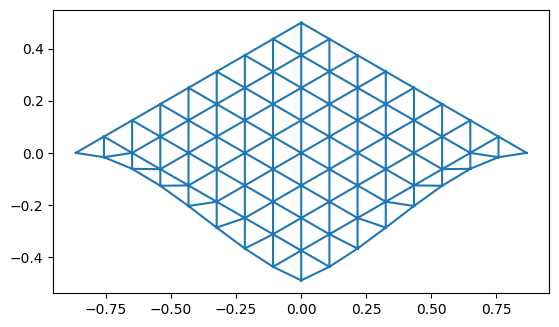

In [45]:

# Set a threshold for the aspect ratio
aspect_ratio_threshold = 3  # Adjust as necessary; higher value allows more skew

# Filter triangles by aspect ratio
filtered_triangles = []
for simplex in tri.simplices:
    p1, p2, p3 = points[simplex]
    ar = aspect_ratio(p1, p2, p3)
    if ar < aspect_ratio_threshold:  # Only keep triangles with a good aspect ratio
        filtered_triangles.append(simplex)

# Convert the filtered triangles list to a numpy array for plotting
filtered_triangles = np.array(filtered_triangles)

# Plot the triangulation with filtered triangles
plt.figure()
plt.triplot(points[:, 0], points[:, 1], filtered_triangles)
plt.gca().set_aspect('equal')
plt.show()

In [46]:
# Extract the elements (triangles) and nodes
Face_Nodes = filtered_triangles  # same as DT.ConnectivityList in MATLAB
Nodes = points  # same as DT.Points in MATLAB
Nodes = np.hstack((Nodes, np.zeros((Nodes.shape[0], 1))))  # Add zeros column for Z coordinate

# For face nodes, change to matlab based indexing
Face_Nodes = Face_Nodes + np.ones((len(Face_Nodes),3));

print("Face_Nodes_length:",len(Face_Nodes))
print("Nodes_length:",len(Nodes))
# print("Face_Nodes:", Face_Nodes)
# print("Nodes:", Nodes)

Face_Nodes_length: 128
Nodes_length: 81


In [47]:
# Filename
filename = 'stingray_n8_python.txt'

# Create and write '*shellNodes' to the file
with open(filename, 'w') as f:
    f.write('*Nodes\n')

# Append the Nodes matrix to the file
with open(filename, 'a') as f:
    np.savetxt(f, Nodes, fmt='%f', delimiter=', ', header='', comments='')

# Append '*FaceNodes' to the file
with open(filename, 'a') as f:
    f.write('*Triangles\n')

# Append the Face_Nodes matrix to the file
with open(filename, 'a') as f:
    np.savetxt(f, Face_Nodes, fmt='%d', delimiter=', ', header='', comments='')